In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Dropout

In [2]:
import os
import cv2
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import matplotlib.pyplot as plt

In [5]:
#pip install opencv-python

In [6]:
datapath="trainingSet/"

In [7]:
myList=os.listdir(datapath)
print("Total No of Classes:",len(myList))
noOfClass=len(myList)

Total No of Classes: 10


In [8]:
images=[]
classNo=[]
print("loading Images...")
print("Importing Classes:",end=" ")
for x in range(0,noOfClass):
    myPicList=os.listdir(datapath+"/"+str(x))
    for y in myPicList:
        curImg=cv2.imread(datapath+"/"+str(x)+"/"+y)
        curImg=cv2.resize(curImg,(28,28))
        images.append(curImg)
        classNo.append(x)
    print(x,end=" ")
print("\nImage Load Successfully Completed!!!")

loading Images...
Importing Classes: 0 1 2 3 4 5 6 7 8 9 
Image Load Successfully Completed!!!


In [9]:
print(len(images))
print(len(classNo))

42000
42000


In [10]:
images=np.array(images)
classNo=np.array(classNo)

In [11]:
print(images.shape)
print(classNo.shape)

(42000, 28, 28, 3)
(42000,)


In [12]:
X_train,X_test,y_train,y_test=train_test_split(images,classNo,test_size=0.2)

In [13]:
print(X_train.shape)
print(X_test.shape)

(33600, 28, 28, 3)
(8400, 28, 28, 3)


In [14]:
X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=0.2)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

(26880, 28, 28, 3)
(8400, 28, 28, 3)
(6720, 28, 28, 3)


In [16]:
numofsample=[]
for x in range(0,noOfClass):
    numofsample.append(len(np.where(y_train==x)[0]))

In [17]:
numofsample

[2677, 2964, 2653, 2777, 2613, 2436, 2660, 2823, 2591, 2686]

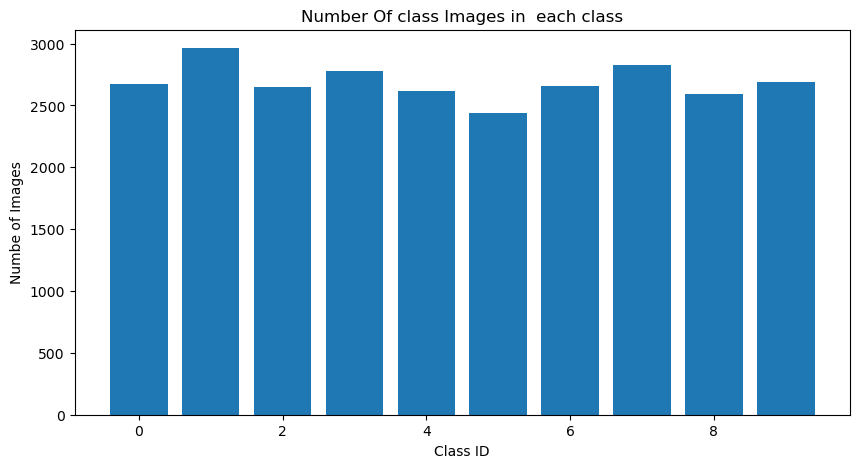

In [18]:
plt.figure(figsize=(10,5))
plt.bar(range(0,noOfClass),numofsample)
plt.title("Number Of class Images in  each class")
plt.xlabel("Class ID")
plt.ylabel("Numbe of Images")
plt.show()

In [19]:
def preProcessing(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.equalizeHist(img)
    img=img/255
    return img

In [20]:
X_train=np.array(list(map(preProcessing,X_train)))
#img=preProcessing(X_train[31])
img=X_train[30]
img=cv2.resize(img,(300,300))
cv2.imshow("Preprocessed",img)
cv2.waitKey(0)

-1

In [21]:
X_train[30].shape

(28, 28)

In [22]:
X_test=np.array(list(map(preProcessing,X_test)))
X_validation=np.array(list(map(preProcessing,X_validation)))

In [24]:
print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
print("After Reshape")
print(X_train.shape)

(26880, 28, 28)
After Reshape
(26880, 28, 28, 1)


In [25]:
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)

In [27]:
from keras.preprocessing.image import ImageDataGenerator

In [28]:
dataGen=ImageDataGenerator(width_shift_range=0.1,
                          height_shift_range=0.1,
                          zoom_range=0.2,
                          shear_range=0.1,
                          rotation_range=10)

In [29]:
dataGen.fit(X_train)

In [31]:
from tensorflow.keras.utils import to_categorical

In [32]:
y_train=to_categorical(y_train,noOfClass)
y_test=to_categorical(y_test,noOfClass)
y_validation=to_categorical(y_validation,noOfClass)

In [38]:
from keras.layers import Conv2D, MaxPooling2D

In [40]:
from keras.optimizers import Adam

In [43]:
def mycnnmodel():
    noOfFilters=60
    sizeofFilter1=(5,5)
    sizeofFilter2=(3,3)
    sizeofPool=(2,2)
    noofNode=500
    model=Sequential()
    model.add((Conv2D(noOfFilters,sizeofFilter1,input_shape=(28,28,1),activation="relu")))
    model.add((Conv2D(noOfFilters,sizeofFilter1,activation="relu")))
    model.add(MaxPooling2D(pool_size=sizeofPool))
    model.add((Conv2D(noOfFilters//2,sizeofFilter2,activation="relu")))
    model.add((Conv2D(noOfFilters//2,sizeofFilter2,activation="relu")))
    model.add(MaxPooling2D(pool_size=sizeofPool))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(noofNode,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClass,activation='softmax'))
    model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=["accuracy"])
    return model
    

In [44]:
model=mycnnmodel()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 60)        1560      
                                                                 
 conv2d_9 (Conv2D)           (None, 20, 20, 60)        90060     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 10, 10, 60)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 30)          16230     
                                                                 
 conv2d_11 (Conv2D)          (None, 6, 6, 30)          8130      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 30)          0         
 g2D)                                                 

In [45]:
batchsize=50
epochsize=10
stepPerEpoch=500
history=model.fit_generator(dataGen.flow(X_train,y_train,
                                 batch_size=batchsize),
                                  steps_per_epoch=stepPerEpoch,
                                   epochs=epochsize,
                                    validation_data=(X_validation,y_validation),
                                       shuffle=1)


C:\Users\sarka\AppData\Local\Temp\ipykernel_14376\3920484354.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(dataGen.flow(X_train,y_train,


Epoch 1/10
500/500 [==============================] - 133s 257ms/step - loss: 0.8828 - accuracy: 0.7046 - val_loss: 0.1489 - val_accuracy: 0.9542
Epoch 2/10
500/500 [==============================] - 131s 262ms/step - loss: 0.3460 - accuracy: 0.8914 - val_loss: 0.0974 - val_accuracy: 0.9695
Epoch 3/10
500/500 [==============================] - 132s 263ms/step - loss: 0.2483 - accuracy: 0.9246 - val_loss: 0.0929 - val_accuracy: 0.9711
Epoch 4/10
500/500 [==============================] - 130s 261ms/step - loss: 0.2058 - accuracy: 0.9361 - val_loss: 0.0664 - val_accuracy: 0.9805
Epoch 5/10
500/500 [==============================] - 131s 262ms/step - loss: 0.1786 - accuracy: 0.9477 - val_loss: 0.0522 - val_accuracy: 0.9829
Epoch 6/10
500/500 [==============================] - 132s 264ms/step - loss: 0.1511 - accuracy: 0.9551 - val_loss: 0.0624 - val_accuracy: 0.9811
Epoch 7/10
500/500 [==============================] - 131s 262ms/step - loss: 0.1449 - accuracy: 0.9565 - val_loss: 0.0511 -

In [47]:
score=model.evaluate(X_test,y_test,verbose=0)
print("Test Score=",score[0])
print("Test Accuracy=",score[1])

Test Score= 0.034295935183763504
Test Accuracy= 0.9894047379493713


In [48]:
import pickle

In [50]:
pickle_out=open("CNN_Model_trained.h5","wb")
pickle.dump(model,pickle_out)
pickle_out.close()